# Crop Production Analysis in India

## Introduction
The agriculture business domain is evolving with advancements in technology. This project aims to analyze a dataset on crop production in India to predict crop production and uncover insights into key indicators and metrics that influence crop production. The goal is to create visualizations and dashboards to effectively communicate findings and facilitate stakeholder collaboration.


## Import Libraries

Import the necessary libraries for data analysis and visualization.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Preprocessing
In this section, we will load the dataset and perform initial preprocessing steps, including handling missing values and basic exploration of the data.


In [4]:
# Load Data
data = pd.read_csv('crop_production/crop_production.csv') #https://data.world/thatzprem/agriculture-india
pd.set_option("display.max_columns", None)

In [5]:
data.shape

(15831, 7)

In [6]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15831 entries, 0 to 15830
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     15831 non-null  object 
 1   District_Name  15830 non-null  object 
 2   Crop_Year      15830 non-null  float64
 3   Season         15830 non-null  object 
 4   Crop           15830 non-null  object 
 5   Area           15830 non-null  float64
 6   Production     15760 non-null  float64
dtypes: float64(3), object(4)
memory usage: 865.9+ KB


In [8]:
print(data.describe())

          Crop_Year           Area    Production
count  15830.000000   15830.000000  1.576000e+04
mean    2006.075237    9677.251678  1.168658e+06
std        5.125498   37736.103854  2.183598e+07
min     1997.000000       0.200000  0.000000e+00
25%     2002.000000     126.000000  1.957500e+02
50%     2006.000000     727.000000  1.251000e+03
75%     2011.000000    4000.000000  8.794000e+03
max     2014.000000  877029.000000  7.801620e+08


In [9]:
print(data.nunique())

State_Name          4
District_Name      41
Crop_Year          18
Season              6
Crop               77
Area             6101
Production       7551
dtype: int64


In [10]:
print(data.isnull().sum())


State_Name        0
District_Name     1
Crop_Year         1
Season            1
Crop              1
Area              1
Production       71
dtype: int64


## Data Cleaning

Remove rows with missing values to ensure the analysis is accurate.


In [11]:
# Drop rows with missing values
data.dropna(inplace=True)

# Ensure Correct Data Types
data['Crop_Year'] = data['Crop_Year'].astype(int)

# Check for Duplicates
data = data.drop_duplicates()
data.shape


(15760, 7)

In [12]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


## Exploratory Data Analysis (EDA)
This section includes various visualizations to understand the data better and identify patterns and trends.


## Univariate Analysis

### Distribution of Numerical Features
We will plot histograms for numerical features to understand their distribution.


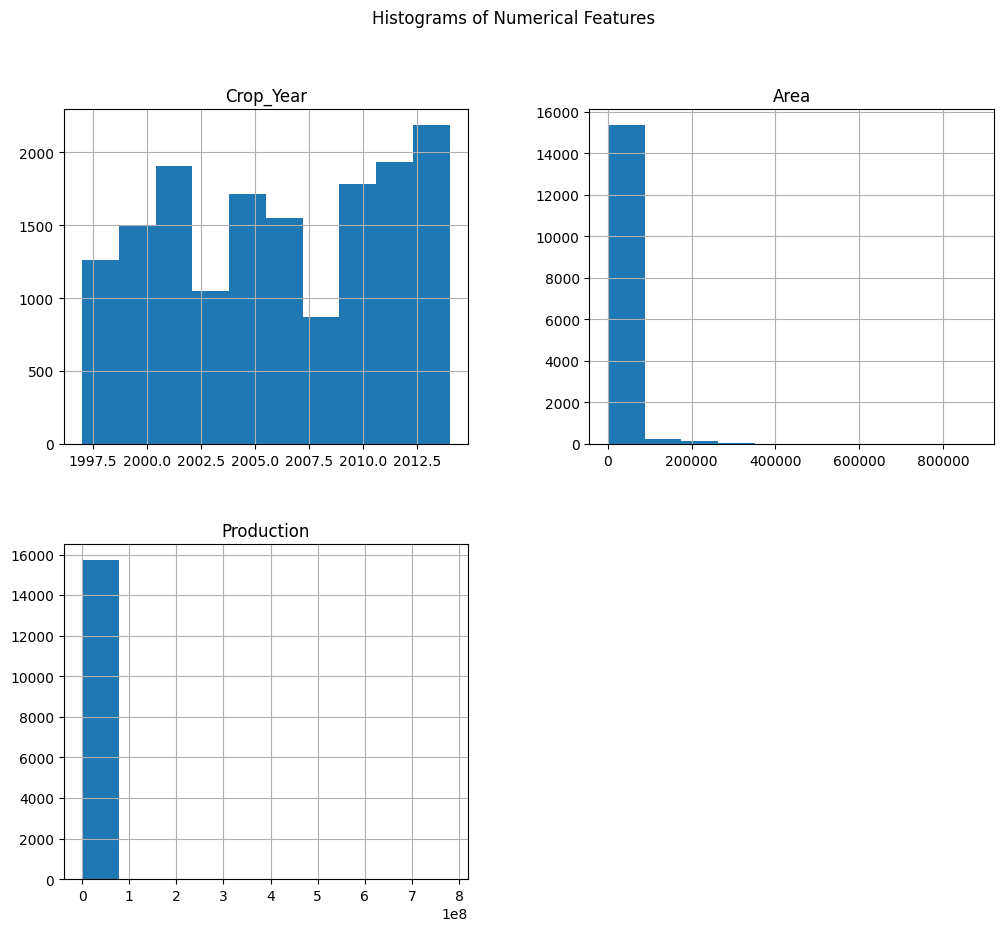

In [13]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


### Distribution of Categorical Features
Next, we will visualize the distribution of categorical features using bar charts.


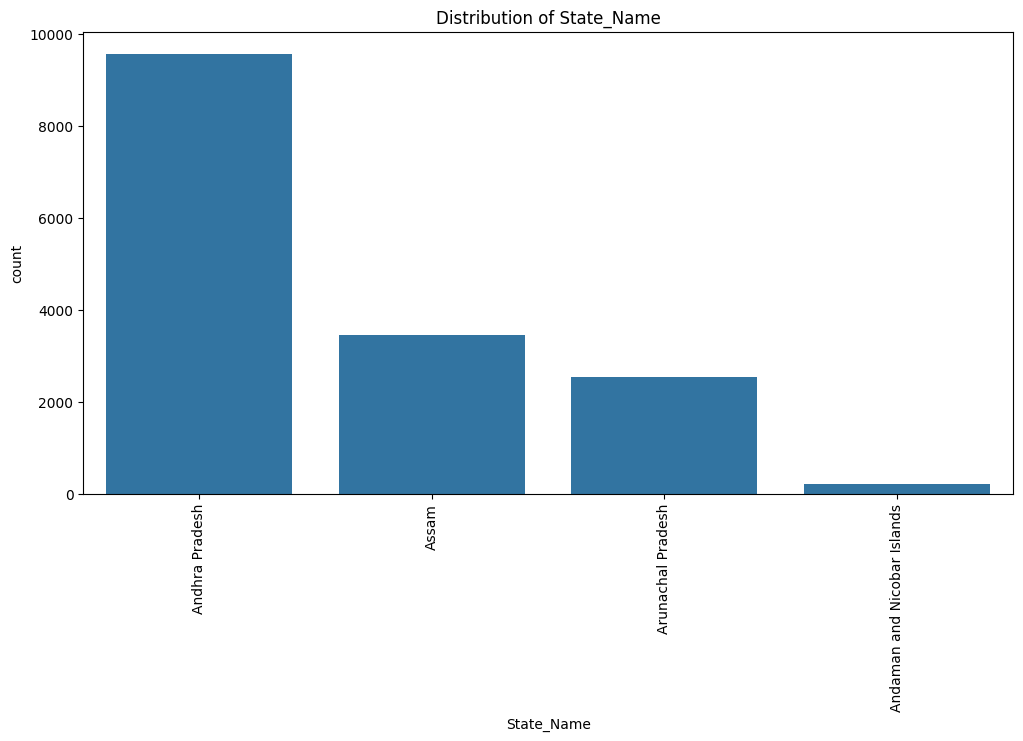

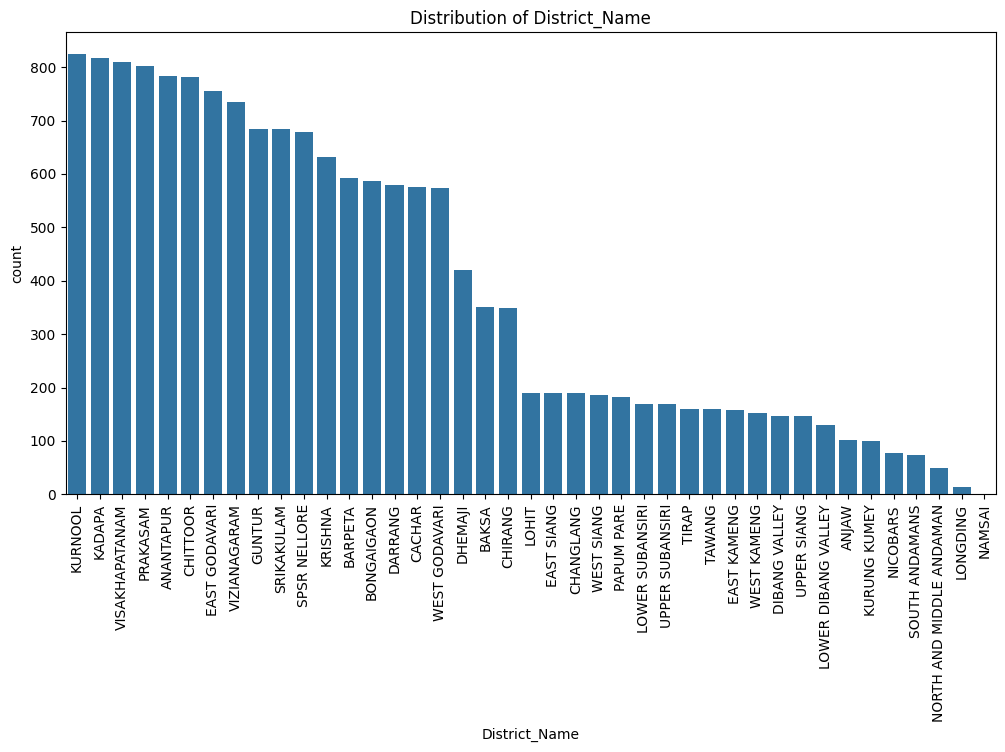

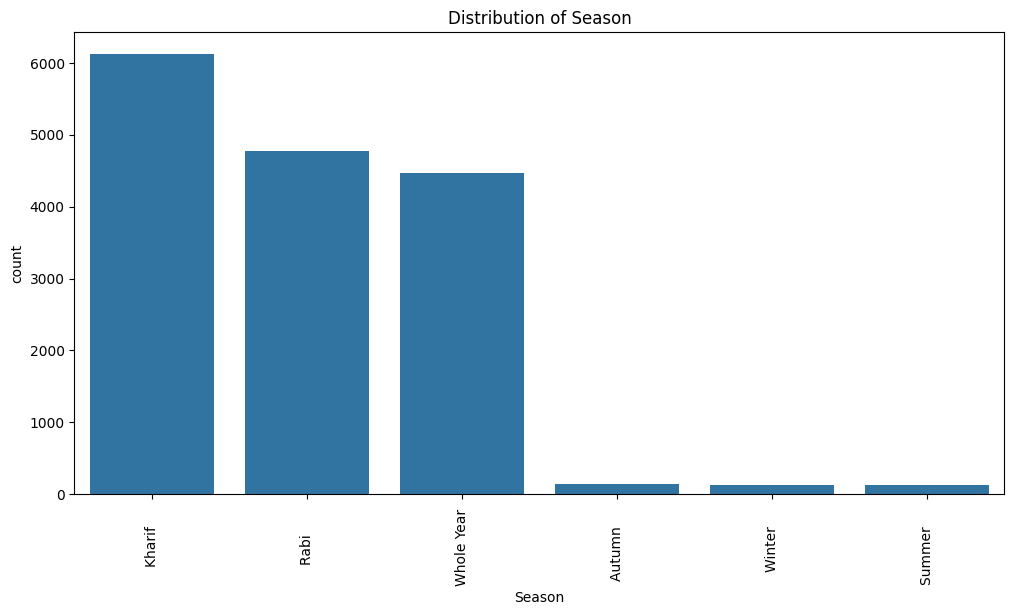

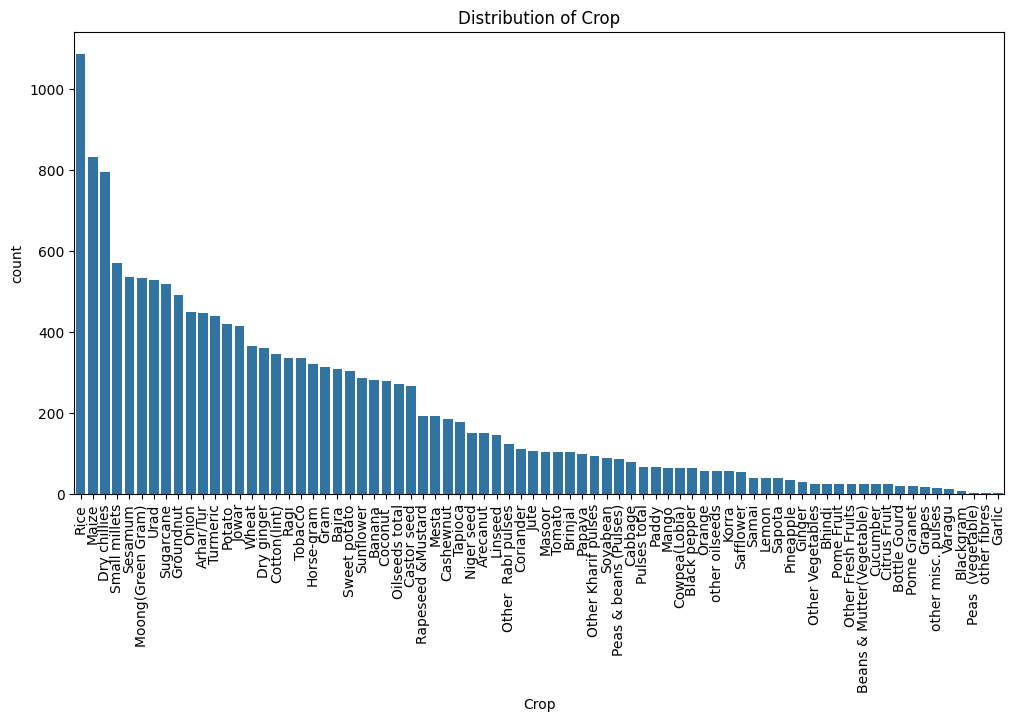

In [14]:
import seaborn as sns

# Plot bar charts for categorical features
for col in ['State_Name', 'District_Name', 'Season', 'Crop']:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()


## Bivariate Analysis

## Yearly Crop Production

Analyze and visualize the total crop production for each year.
We will analyze the crop production over time to observe trends and patterns.


    Crop_Year    Production
0        1997  2.251524e+07
1        1998  4.879255e+07
2        1999  4.764719e+07
3        2000  1.221057e+09
4        2001  1.256678e+09
5        2002  1.283858e+09
6        2003  1.329474e+09
7        2004  1.323879e+09
8        2005  9.910141e+08
9        2006  1.462089e+09
10       2007  6.523181e+07
11       2008  1.030611e+09
12       2009  1.217213e+09
13       2010  1.733483e+08
14       2011  1.455368e+09
15       2012  1.704205e+09
16       2013  1.649240e+09
17       2014  2.135822e+09


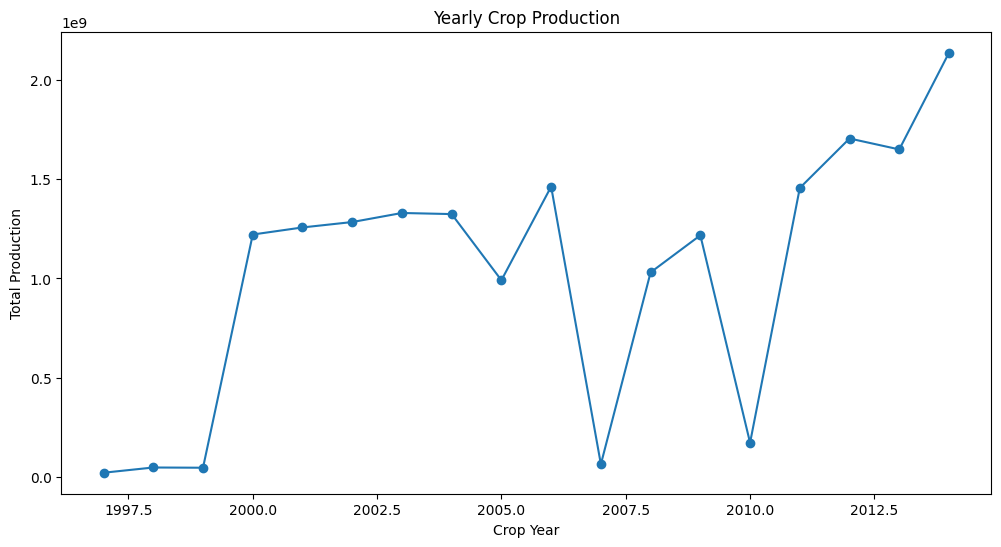

In [15]:
# Group by Crop_Year and sum Production
df_yearly_production = data.groupby('Crop_Year')['Production'].sum().reset_index()
print(df_yearly_production)
# Plot crop production over time
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_production['Crop_Year'], df_yearly_production['Production'],marker='o')
plt.xlabel('Crop Year')
plt.ylabel('Total Production')
plt.title('Yearly Crop Production')
plt.show()


## Top 10 Crops by Area

Identify and visualize the top 10 crops by area of cultivation.
We will identify and visualize the top crops by area.


In [16]:
# Group by Crop and sum Area
df_top_crops = data.groupby('Crop')['Area'].sum().reset_index()
df_top_crops = df_top_crops.sort_values('Area', ascending=False).head(10)
df_top_crops

,Crop,Area
56,Rice,59501580.93
25,Groundnut,24797267.25
16,Cotton(lint),7424167.00
70,Urad,7217510.00
23,Gram,6390311.00
64,Sunflower,4708452.90
32,Maize,3776320.54
1,Arhar/Tur,3400973.00
36,Moong(Green Gram),3140412.00
63,Sugarcane,3002287.51


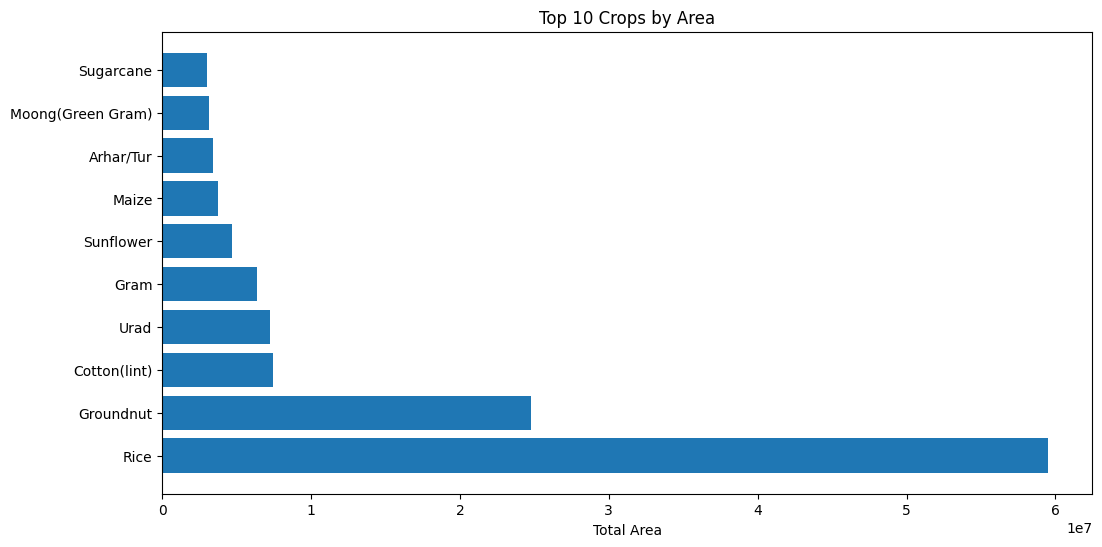

In [17]:
# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(df_top_crops['Crop'], df_top_crops['Area'])
plt.xlabel('Total Area')
plt.title('Top 10 Crops by Area')
plt.show()

## Pie Chart (Production Proportions)

                 Crop    Production
14           Coconut   1.785961e+10
63          Sugarcane  2.283159e+08
56               Rice  1.621390e+08
32              Maize  1.964319e+07
25          Groundnut  1.838658e+07
..                ...           ...
8        Bottle Gourd  0.000000e+00
47  Peas  (vegetable)  0.000000e+00
44   Other Vegetables  0.000000e+00
18           Cucumber  0.000000e+00
73       other fibres  0.000000e+00

[76 rows x 2 columns]


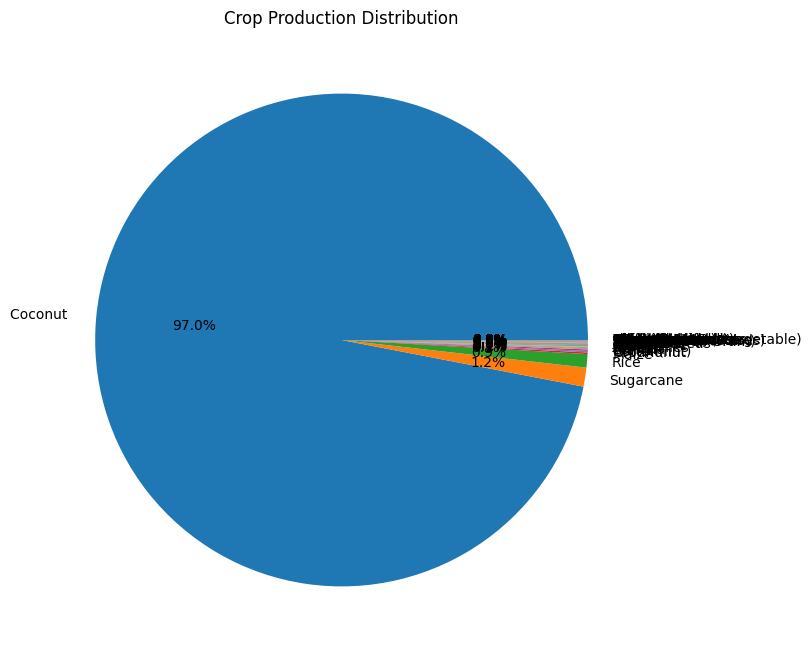

In [18]:
# Group by Crop and sum Production
df_production = data.groupby('Crop')['Production'].sum().reset_index()
df_production = df_production.sort_values('Production', ascending=False)
print(df_production)
# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(df_production['Production'], labels=df_production['Crop'], autopct='%1.1f%%')
plt.title('Crop Production Distribution')
plt.show()


## Correlation Heatmap

            Crop_Year      Area  Production
Crop_Year    1.000000 -0.016190    0.013563
Area        -0.016190  1.000000    0.031631
Production   0.013563  0.031631    1.000000


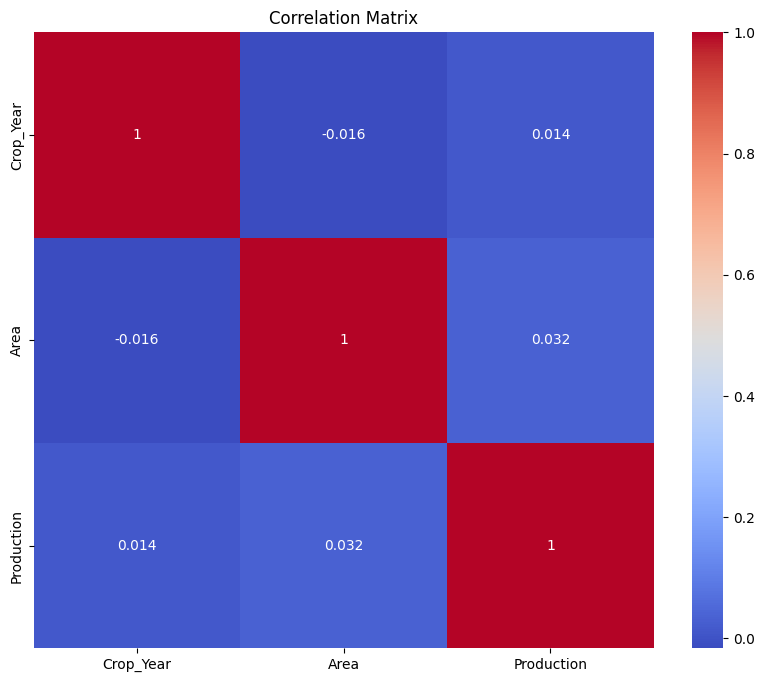

In [19]:
# Compute correlation matrix
corr = data[['Crop_Year', 'Area', 'Production']].corr()
print(corr)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Seasonal Analysis

### Seasonal Crops
Analyze which crops are prevalent in different seasons.


    Crop_Year       Season                                               Crop
97       2013  Kharif       Arecanut,Arhar/Tur,Bajra,Brinjal,Cabbage,Cashe...
91       2012  Kharif       Arecanut,Arhar/Tur,Bajra,Brinjal,Castor seed,C...
58       2006  Whole Year   Arecanut,Banana,Black pepper,Cashewnut,Coconut...
34       2002  Whole Year   Arecanut,Banana,Black pepper,Cashewnut,Coconut...
40       2003  Whole Year   Arecanut,Banana,Black pepper,Cashewnut,Coconut...
..        ...          ...                                                ...
49       2005  Kharif       Rice,Arhar/Tur,Bajra,Castor seed,Cotton(lint),...
55       2006  Kharif       Rice,Arhar/Tur,Bajra,Castor seed,Cotton(lint),...
78       2010  Autumn                                          Rice,Sugarcane
64       2007  Whole Year   Sugarcane,Tobacco,Dry chillies,Dry ginger,Oils...
10       1998  Whole Year   Sugarcane,Tobacco,Dry chillies,Dry ginger,Oils...

[108 rows x 3 columns]


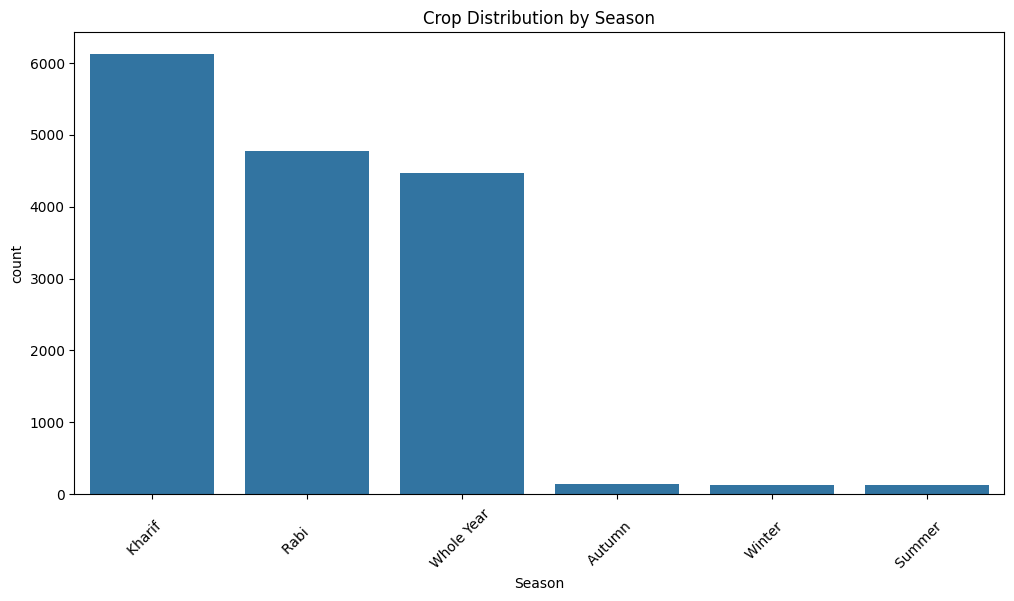

In [20]:
# Group by Crop_Year and Season
df_seasonal_crops = data.groupby(['Crop_Year', 'Season'])['Crop'].unique().reset_index()
df_seasonal_crops['Crop'] = df_seasonal_crops['Crop'].apply(','.join)
df_seasonal_crops = df_seasonal_crops.sort_values('Crop')
print(df_seasonal_crops)
# Plot seasonal crops
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Season', order=data['Season'].value_counts().index)
plt.title('Crop Distribution by Season')
plt.xticks(rotation=45)
plt.show()


## Production Analysis

            Crop    Production
14      Coconut   1.785961e+10
63     Sugarcane  2.283159e+08
56          Rice  1.621390e+08
32         Maize  1.964319e+07
25     Groundnut  1.838658e+07
16  Cotton(lint)  1.788315e+07
3         Banana  1.778848e+07
33         Mango  8.253919e+06
19  Dry chillies  7.860020e+06
23          Gram  7.507653e+06


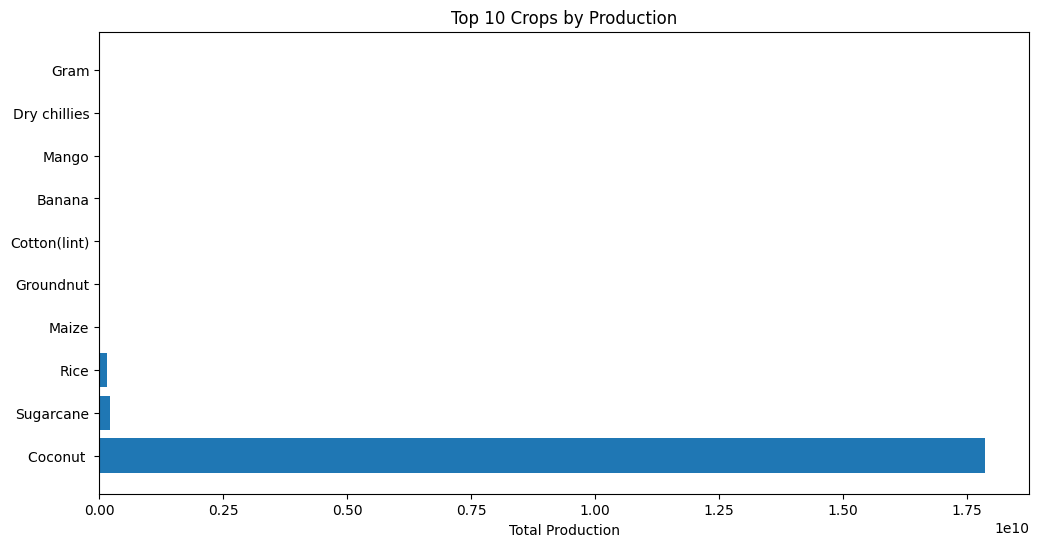

In [21]:
# Plot top crops by total production
df_top_production = data.groupby('Crop')['Production'].sum().reset_index()
df_top_production = df_top_production.sort_values('Production', ascending=False).head(10)
print(df_top_production)
plt.figure(figsize=(12, 6))
plt.barh(df_top_production['Crop'], df_top_production['Production'])
plt.xlabel('Total Production')
plt.title('Top 10 Crops by Production')
plt.show()


# Conclusion
The EDA has revealed various insights into crop production trends and distributions. We observed the distribution of production and area, identified outliers, explored relationships between features, and visualized key metrics. These insights will help guide further analysis and modeling.
